Using the MNIST heart disease dataset to predict heart disease using Logistic Regression and using PCA to visualize the data by graphing.

Dependency imports and data loading.

In [ ]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import normalize
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from mpl_toolkits.mplot3d import Axes3D

In [ ]:
# Getting CSV data into pandas dataframe.
heart_data = pd.read_csv('/content/heart_disease_data.csv')

Visualizing the data.

In [ ]:
heart_data.head()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
0,63,1,3,145,233,1,0,150,0,2.3,0,0,1,1
1,37,1,2,130,250,0,1,187,0,3.5,0,0,2,1
2,41,0,1,130,204,0,0,172,0,1.4,2,0,2,1
3,56,1,1,120,236,0,1,178,0,0.8,2,0,2,1
4,57,0,0,120,354,0,1,163,1,0.6,2,0,2,1


In [ ]:
heart_data.shape

(303, 14)

In [ ]:
heart_data.describe()

,age,sex,cp,trestbps,chol,fbs,restecg,thalach,exang,oldpeak,slope,ca,thal,target
count,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000,303.000000
mean,54.366337,0.683168,0.966997,131.623762,246.264026,0.148515,0.528053,149.646865,0.326733,1.039604,1.399340,0.729373,2.313531,0.544554
std,9.082101,0.466011,1.032052,17.538143,51.830751,0.356198,0.525860,22.905161,0.469794,1.161075,0.616226,1.022606,0.612277,0.498835
min,29.000000,0.000000,0.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,47.500000,0.000000,0.000000,120.000000,211.000000,0.000000,0.000000,133.500000,0.000000,0.000000,1.000000,0.000000,2.000000,0.000000
50%,55.000000,1.000000,1.000000,130.000000,240.000000,0.000000,1.000000,153.000000,0.000000,0.800000,1.000000,0.000000,2.000000,1.000000
75%,61.000000,1.000000,2.000000,140.000000,274.500000,0.000000,1.000000,166.000000,1.000000,1.600000,2.000000,1.000000,3.000000,1.000000
max,77.000000,1.000000,3.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,2.000000,4.000000,3.000000,1.000000


Splitting the features and targets into seperate arrays for model training and testing.

In [ ]:
heart_data_X = heart_data.drop(columns='target', axis=1)
heart_data_Y = heart_data['target']

In [ ]:
print("Feature array")
print(heart_data_X)

Feature array
     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
0     63    1   3       145   233    1        0      150      0      2.3   
1     37    1   2       130   250    0        1      187      0      3.5   
2     41    0   1       130   204    0        0      172      0      1.4   
3     56    1   1       120   236    0        1      178      0      0.8   
4     57    0   0       120   354    0        1      163      1      0.6   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
298   57    0   0       140   241    0        1      123      1      0.2   
299   45    1   3       110   264    0        1      132      0      1.2   
300   68    1   0       144   193    1        1      141      0      3.4   
301   57    1   0       130   131    0        1      115      1      1.2   
302   57    0   1       130   236    0        0      174      0      0.0   

     slope  ca  thal  
0        0   0     1  
1        0   0     2  
2   

In [ ]:
print("Target array")
print(heart_data_Y)

Target array
0      1
1      1
2      1
3      1
4      1
      ..
298    0
299    0
300    0
301    0
302    0
Name: target, Length: 303, dtype: int64


Splitting into training and testing data.

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(heart_data_X, heart_data_Y, test_size=0.2, stratify=heart_data_Y, random_state=2)

In [ ]:
print(X_train.shape, X_test.shape)

(242, 13) (61, 13)


In [ ]:
print(Y_train.shape, Y_test.shape)

(242,) (61,)


Training our model using Logistic Regression.

In [ ]:
model = LogisticRegression()
model.fit(X_train, Y_train)

/usr/local/lib/python3.11/dist-packages/sklearn/linear_model/_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

Failed to converge. This will get fixed later.

Evaluating the model

In [ ]:
X_train_pred = model.predict(X_train)
training_accuracy = accuracy_score(X_train_pred, Y_train)
print("Training data accuracy: ", training_accuracy)

Training data accuracy:  0.8512396694214877


In [ ]:
X_test_pred = model.predict(X_test)
test_accuracy = accuracy_score(X_test_pred, Y_test)
print("Test data accuracy: ", test_accuracy)

Test data accuracy:  0.819672131147541


Predicting heart disease using the model.

In [ ]:
pred_data = (62,0,0,140,268,0,0,160,0,3.6,0,2,2)
pred_data_np = np.asarray(pred_data)
pred_data_np = pred_data_np.reshape(1, -1)

prediction = model.predict(pred_data_np)
print("Predected : ", prediction)

Predected :  [0]


/usr/local/lib/python3.11/dist-packages/sklearn/utils/validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


Not the best model. The Logistic Regression model failed to converge resulting in a model with parameters that do not minimize the cost function.

To fix this we can do two things. One is to normalize the training data for feature scaling. The other thing we can do is to increase the number of max iterations.


---



The accuracy I got for the training data: 0.8512396694214877

~85%

The accuracy I got for the test data: 0.819672131147541

~82%

With a 3% difference in accuracy I'm not sure if the model is overfitting or not.

In [ ]:
print(X_train)

     age  sex  cp  trestbps  chol  fbs  restecg  thalach  exang  oldpeak  \
61    54    1   1       108   309    0        1      156      0      0.0   
238   77    1   0       125   304    0        0      162      1      0.0   
160   56    1   1       120   240    0        1      169      0      0.0   
158   58    1   1       125   220    0        1      144      0      0.4   
289   55    0   0       128   205    0        2      130      1      2.0   
..   ...  ...  ..       ...   ...  ...      ...      ...    ...      ...   
100   42    1   3       148   244    0        0      178      0      0.8   
49    53    0   0       138   234    0        0      160      0      0.0   
300   68    1   0       144   193    1        1      141      0      3.4   
194   60    1   2       140   185    0        0      155      0      3.0   
131   49    0   1       134   271    0        1      162      0      0.0   

     slope  ca  thal  
61       2   0     3  
238      2   3     2  
160      0   0    

In [ ]:
X_train_normalized = normalize(X_train, norm='l2', axis=1)

In [ ]:
print(X_train_normalized)

[[0.14728995 0.00272759 0.00272759 ... 0.00545518 0.         0.00818278]
 [0.20562012 0.00267039 0.         ... 0.00534078 0.00801117 0.00534078]
 [0.17389627 0.00310529 0.00310529 ... 0.         0.         0.00621058]
 ...
 [0.23671899 0.00348116 0.         ... 0.00348116 0.00696232 0.01044348]
 [0.21021082 0.00350351 0.00700703 ... 0.00350351 0.         0.00700703]
 [0.14142195 0.         0.00288616 ... 0.00288616 0.         0.00577232]]


In [ ]:
normalized_model = LogisticRegression(max_iter=1000)
normalized_model.fit(X_train_normalized, Y_train)

LogisticRegression(max_iter=1000)

Fitted model with normalizied train data.

Now we check for a change in accuracy.

In [ ]:
X_train_norm_pred = model.predict(X_train)
training_accuracy_norm = accuracy_score(X_train_norm_pred, Y_train)
print("Training data accuracy on normalizied model: ", training_accuracy_norm)

Training data accuracy on normalizied model:  0.8512396694214877


In [ ]:
X_test_norm_pred = model.predict(X_test)
test_accuracy_norm = accuracy_score(X_test_norm_pred, Y_test)
print("Test data accuracy on normalizied model: ", test_accuracy_norm)

Test data accuracy on normalizied model:  0.819672131147541


Hmmmmmmmmm...

Well it looks like feature scaling using normalization and increasing the max iterations did not improve our accuracy.

Training data accuracy on normalizied model:  0.8512396694214877

Test data accuracy on normalizied model:  0.819672131147541

---

In theory feature scaling should help gradient descent converge faster. In this case we did get a convergance and maybe the first time was enough to find the minimum of the cost function but not enough iterations to reach an exit condition.

---

I could try rerunning a couple times, removing the random state to see if that gives a better accuracy or changes the accuracy. Or we can split the dataset by giving more data to the training set.


---


Running this again but changing the random state to 1 gives a slightly better prediction.


---



Training data accuracy on normalizied model:  0.859504132231405

Test data accuracy on normalizied model:  0.8360655737704918


---


Random state set to 3.


---


Training data accuracy on normalizied model:  0.8636363636363636

Test data accuracy on normalizied model:  0.8032786885245902

Training set accuracy for random state 3 has been the most accurate so far but the testing set accuracy has been the lowest so far.

The difference between the training and test set this time is pretty big so this model is likely overfitting.



---




This may be the most accurate that I can get with this dataset at least within my limited knowledge and experience.


---



Moving on, I wanted to use Principal Component Analysis (PCA) to visualize the data and to see the change in accuracy when the transformed dataset is used to train a Logistic Regression model.

In [ ]:
# Normalizing original dataset

heart_data_X_norm = normalize(heart_data_X, norm='l2', axis=1)
print(heart_data_X_norm)
heart_data_X_norm.shape

# Standardizing original dataset

# scaler = StandardScaler()
# scaler.fit(heart_data_X)
# heart_data_X_std = scaler.transform(heart_data_X)
# print(heart_data_X_std)
# heart_data_X_std.shape

[[0.19745405 0.00313419 0.00940257 ... 0.         0.         0.00313419]
 [0.10874818 0.00293914 0.00587828 ... 0.         0.         0.00587828]
 [0.1368249  0.         0.00333719 ... 0.00667439 0.         0.00667439]
 ...
 [0.23671899 0.00348116 0.         ... 0.00348116 0.00696232 0.01044348]
 [0.25352009 0.00444772 0.         ... 0.00444772 0.00444772 0.01334316]
 [0.1749685  0.         0.00306962 ... 0.00306962 0.00306962 0.00613925]]


(303, 13)

Reducing 13 dimensions/features to 1 and 2 dimensions/features using PCA and observing the explained variance ratio for each.

In [ ]:
pca_1 = PCA(n_components=1)
pca_2 = PCA(n_components=2)

pca_1.fit(heart_data_X_norm)
pca_2.fit(heart_data_X_norm)

print("Explained variance ratio for 1 principal component: ", pca_1.explained_variance_ratio_)
print("Explained variance ratio for 2 principal components: ", pca_2.explained_variance_ratio_)

Explained variance ratio for 1 principal component:  [0.68600394]
Explained variance ratio for 2 principal components:  [0.68600394 0.26021203]


Using normalization before running PCA gave an explained variance ratio of:

Explained variance ratio for 1 principal component:  [0.68600394]

Explained variance ratio for 2 principal components:  [0.68600394 0.26021203]

---

I will edit the code above to use standardization instead to see if this improves the results.

---

Using standardization these are the results of PCA:

Explained variance ratio for 1 principal component:  [0.21254053]

Explained variance ratio for 2 principal components:  [0.21254053 0.11820708]

Even worse than normalization in terms of dimension reduction.

---

Switching back to normalization, running PCA using 3 principal components, running Logistic Regression, and plotting 2 and 3 dimensions.


In [ ]:
pca_3 = PCA(n_components=3)
pca_3.fit(heart_data_X_norm)
print("Explained variance ratio for 3 principal components: ", pca_3.explained_variance_ratio_)

Explained variance ratio for 3 principal components:  [0.68600394 0.26021203 0.04637812]


In [ ]:
# Transforming our data

X_transformed2 = pca_2.transform(heart_data_X_norm)
X_transformed3 = pca_3.transform(heart_data_X_norm)
print(X_transformed2.shape)
print(X_transformed3.shape)

(303, 2)
(303, 3)


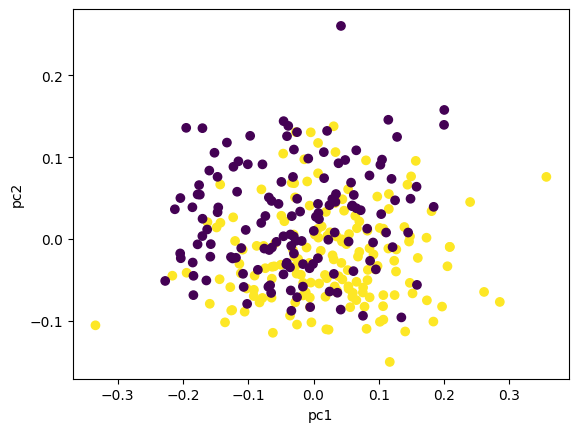

In [ ]:
# Plotting the 2 principal components

plt.scatter(X_transformed2[:, 0], X_transformed2[:, 1], c=heart_data_Y, cmap='viridis')
plt.xlabel('pc1')
plt.ylabel('pc2')
plt.show()

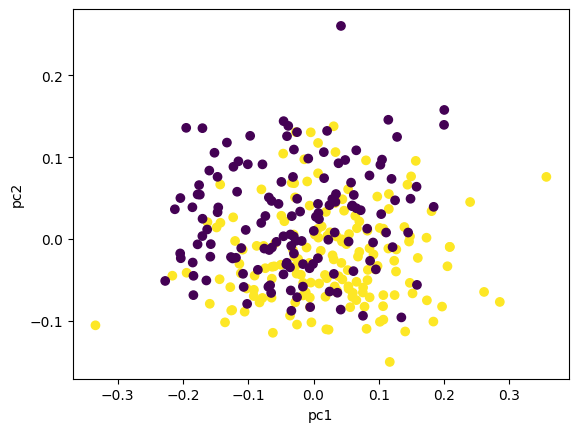

From the plot it looks like Logistic Regression will not do the best at predicting heart disease from this reduced dimension dataset.

Text(0.5, 0, 'PC3')

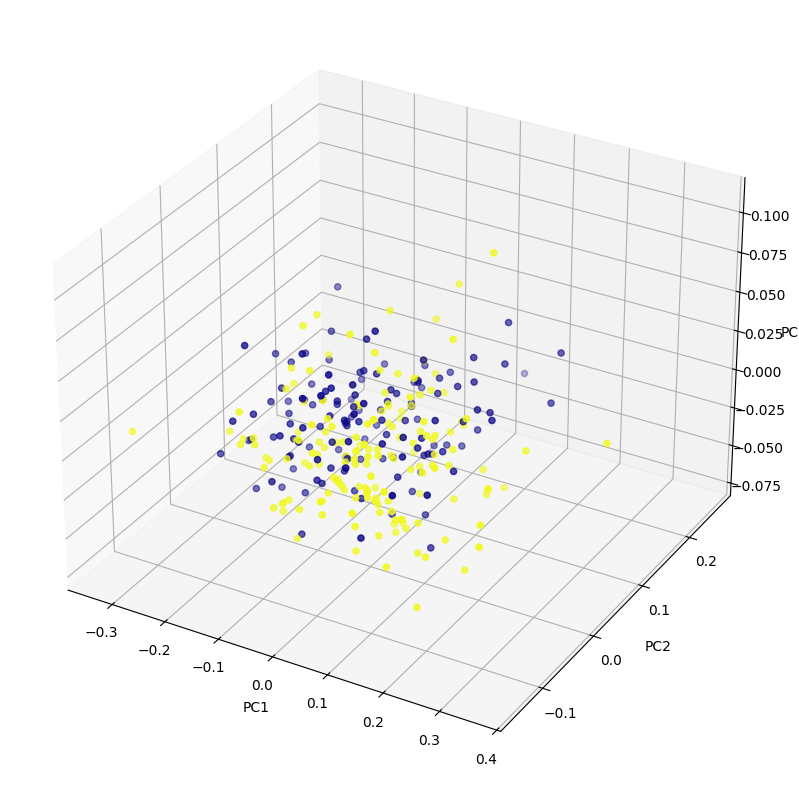

In [ ]:
fig = plt.figure(figsize=(10,10))
axis = fig.add_subplot(111, projection='3d')
axis.scatter(X_transformed3[:,0], X_transformed3[:,1], X_transformed3[:,2], c=heart_data_Y,cmap='plasma')
axis.set_xlabel("PC1", fontsize=10)
axis.set_ylabel("PC2", fontsize=10)
axis.set_zlabel("PC3", fontsize=10)

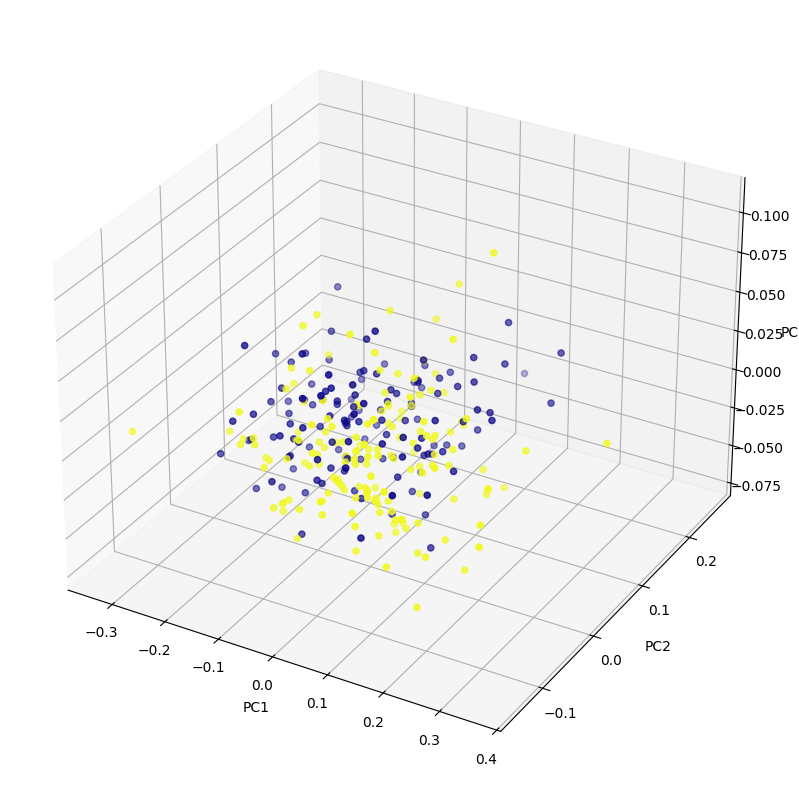

In 3 dimensions from the graph it also looks like Logistic Regression will not do well on this dataset with 3 principal components.

---

It was worth graphing the data after PCA for practice and curiosity.

---

I had initally considered training a Logistic Regression model on the 2 datasets with 2 and 3 principal components to see what the accuracy would be like. I think that is no longer necessary so I will end this project here.

---
I'm new to machine learning so some of what I did was not optimal or maybe not correct. But, I gained experience and that is worth it.